In [52]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [53]:
SEED_VALUE = 42

In [54]:
# Fix seed to make training deterministic.
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [55]:
# ##########################################################################
#	FX
# ##########################################################################



def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):

    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 9])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

In [56]:
def cnn_model(input_shape=(32, 32, 3)):

    model = Sequential()

    #------------------------------------
    # Conv Block 1: 32 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 2: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Conv Block 3: 64 Filters, MaxPool.
    #------------------------------------
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    #------------------------------------
    # Flatten the convolutional features.
    #------------------------------------
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    return model

In [57]:
# ##########################################################################

# Load the dataset (CIFAR-10)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [58]:
print('Learning set:')
print('X: ', end='')
print(X_train.shape)
print('y: ', end='')
print(y_train.shape)

print('Test set:')
print('X: ', end='')
print(X_test.shape)
print('y: ', end='')
print(y_test.shape)

# DEBUG. Plot some of the images
plt.figure(figsize=(18, 9))

num_rows = 4
num_cols = 5

Learning set:
X: (50000, 32, 32, 3)
y: (50000, 1)
Test set:
X: (10000, 32, 32, 3)
y: (10000, 1)


<Figure size 1296x648 with 0 Axes>

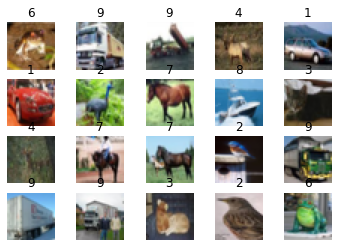

In [59]:
# plot each of the images in the batch and the associated ground truth labels.
for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i,:,:])
    ax.title.set_text(y_train[i,0])
    plt.axis("off")

In [60]:
PROJECAO-> PARA ESPACO PCA

REMAP
DO ESPACO PCA O ELEMENTO ORIGINAL
K -->
ESPACO pca: VETOR ORIGINAL - O DA MEDIA VEZES MEDIA


SyntaxError: invalid syntax (<ipython-input-60-74957e548daf>, line 1)

In [ ]:
# Normalize images to the range [0, 1].
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32") / 255

In [ ]:
# Change the labels from integer to categorical data.
print('Original (integer) label for the first training sample: ', y_train[0])

Original (integer) label for the first training sample:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
# Convert labels to one-hot encoding.
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [ ]:
print('After conversion to categorical one-hot encoded labels: ', y_train[0])

After conversion to categorical one-hot encoded labels:  [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Create the model.
model = cnn_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

In [ ]:
history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split=.3,
                   )

Epoch 1/10


ValueError: in user code:

    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
        return self.compiled_loss(
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\losses.py", line 243, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\losses.py", line 1787, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "c:\Users\rene_\anaconda3\lib\site-packages\keras\backend.py", line 5119, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 10, 2) and (None, 10) are incompatible


In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'],
             )

In [ ]:
# Retrieve training results.
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results([ train_loss, valid_loss ],
            ylabel="Loss",
            ylim = [0.0, 5.0],
            metric_name=["Training Loss", "Validation Loss"],
            color=["g", "b"]);

plot_results([ train_acc, valid_acc ],
            ylabel="Accuracy",
            ylim = [0.0, 1.0],
            metric_name=["Training Accuracy", "Validation Accuracy"],
            color=["g", "b"])

In [ ]:
FAZER RESIZE
import cv2
 
img = cv2.imread('/home/img/python.png', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 60 # percent of original size

In [1]:
import cv2
import os

In [12]:

# List all files in the folder
files = [f for f in os.listdir("../AR_out") if os.path.isfile(os.path.join("../AR_out", f))]
files

['m-001-1.raw.jpg',
 'm-001-10.raw.jpg',
 'm-001-11.raw.jpg',
 'm-001-12.raw.jpg',
 'm-001-13.raw.jpg',
 'm-001-14.raw.jpg',
 'm-001-15.raw.jpg',
 'm-001-16.raw.jpg',
 'm-001-17.raw.jpg',
 'm-001-18.raw.jpg',
 'm-001-19.raw.jpg',
 'm-001-2.raw.jpg',
 'm-001-20.raw.jpg',
 'm-001-21.raw.jpg',
 'm-001-22.raw.jpg',
 'm-001-23.raw.jpg',
 'm-001-24.raw.jpg',
 'm-001-25.raw.jpg',
 'm-001-26.raw.jpg',
 'm-001-3.raw.jpg',
 'm-001-4.raw.jpg',
 'm-001-5.raw.jpg',
 'm-001-6.raw.jpg',
 'm-001-7.raw.jpg',
 'm-001-8.raw.jpg',
 'm-001-9.raw.jpg',
 'm-002-1.raw.jpg',
 'm-002-10.raw.jpg',
 'm-002-11.raw.jpg',
 'm-002-12.raw.jpg',
 'm-002-13.raw.jpg',
 'm-002-14.raw.jpg',
 'm-002-15.raw.jpg',
 'm-002-16.raw.jpg',
 'm-002-17.raw.jpg',
 'm-002-18.raw.jpg',
 'm-002-19.raw.jpg',
 'm-002-2.raw.jpg',
 'm-002-20.raw.jpg',
 'm-002-21.raw.jpg',
 'm-002-22.raw.jpg',
 'm-002-23.raw.jpg',
 'm-002-24.raw.jpg',
 'm-002-25.raw.jpg',
 'm-002-26.raw.jpg',
 'm-002-3.raw.jpg',
 'm-002-4.raw.jpg',
 'm-002-5.raw.jpg',
 'm-00

In [30]:
# resize image
img = cv2.imread("../AR_out/m-001-1.raw.jpg", cv2.IMREAD_UNCHANGED)

#original
print('Original Dimensions : ',img.shape)

# scale
scale_percent = 5 
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)

Original Dimensions :  (576, 768, 3)
Resized Dimensions :  (28, 38, 3)


In [40]:

for file in files:
    #file_path = "../AR_out/" & file
    # Read the image using cv2.imread
    img = cv2.imread(str.join("../AR_out/",file), cv2.IMREAD_UNCHANGED)
    #resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    #arr = np.concatenate((arr, resized), axis=0)  

w


w


In [ ]:
13K POR 3K, MATRIZ DE COVARIANZA, VETORES PROPRIOS E VALORES PROPRIOS


In [ ]:
PARA FAZER A PROJEÇ]AO FAZER A MEDIA DE TODAS AS DIMENSOES

In [ ]:
DIMENSOES 

FAZER NVCUM SUM

TRAZ O VETOR 